In [1]:
from matplotlib import rcParams
# Set the global font to be 'Times New Roman', applies to all text elements
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 16

In [2]:
import matplotlib as mpl
mpl.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'

In [3]:
print(mpl.rcParams['animation.ffmpeg_path'])

/opt/homebrew/bin/ffmpeg


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.animation as animation
import re

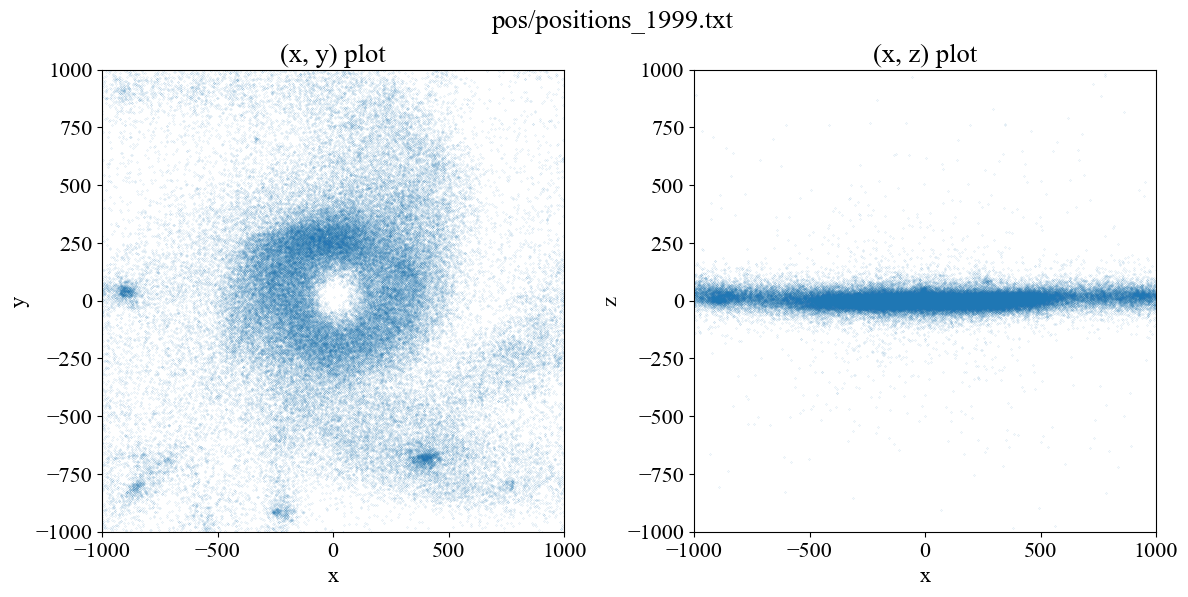

In [9]:
# Function to load positions from a file, skipping lines with 'NULL'
def load_positions(filename):
    valid_lines = []
    with open(filename, 'r') as file:
        for line in file:
            if 'NULL' not in line:
                parts = line.split()
                if len(parts) == 3:
                    valid_lines.append(line)
    # Convert the valid lines into a numpy array
    data = np.genfromtxt(valid_lines, dtype=float)
    return data

# Function to extract the numeric part from the file name
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else -1

# Load and sort all position files numerically
files = sorted(glob.glob("pos/positions_*.txt"), key=extract_number)

# Create a figure for the animation with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Create scatter plots for each subplot
scat1 = ax1.scatter([], [], s=0.01, alpha=0.7)
scat2 = ax2.scatter([], [], s=0.01, alpha=0.7)

# Set the axis limits for both subplots to ensure they are square
# xlim, ylim, zlim = -500, 500, -500
xlim, ylim, zlim = -1000, 1000, -1000
ax1.set_xlim(xlim, ylim)
ax1.set_ylim(xlim, ylim)
ax2.set_xlim(xlim, ylim)
ax2.set_ylim(zlim, ylim)

# Ensure each subplot is square
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')

# Set labels and titles for each subplot
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('(x, y) plot')

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('(x, z) plot')

def update(frame):
    positions = load_positions(files[frame])
    # Update the scatter plot for (x, y)
    scat1.set_offsets(positions[:, [0, 1]])
    # Update the scatter plot for (x, z)
    scat2.set_offsets(positions[:, [0, 2]])
    fig.suptitle(files[frame])  # Update the title of the figure
    return scat1, scat2

ani = animation.FuncAnimation(fig, update, frames=len(files), blit=True)

fps = 50
# Save the animation
ani.save('Final_Simulation_Result.mp4', writer='ffmpeg', fps=fps)
plt.show()

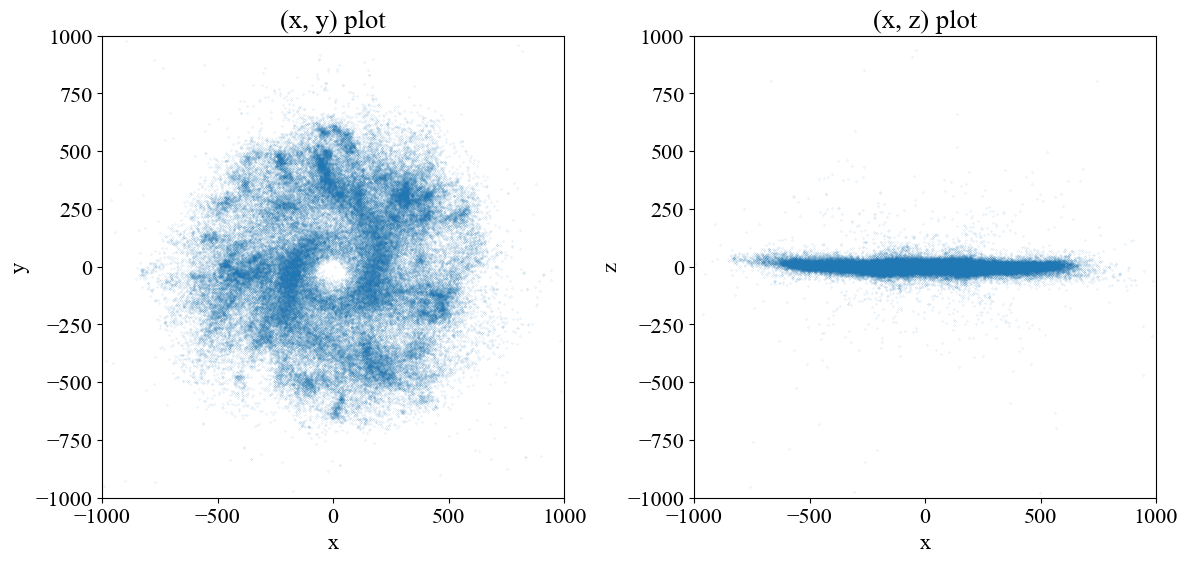

In [8]:
# Function to load positions from a file, skipping lines with 'NULL'
def load_positions(filename):
    valid_lines = []
    with open(filename, 'r') as file:
        for line in file:
            if 'NULL' not in line:
                parts = line.split()
                if len(parts) == 3:
                    valid_lines.append(line)
    # Convert the valid lines into a numpy array
    data = np.genfromtxt(valid_lines, dtype=float)
    return data

# Function to extract the numeric part from the file name
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else -1

# Load and sort all position files numerically
files = sorted(glob.glob("pos/positions_*.txt"), key=extract_number)

# Define the specific iteration to plot
specific_iteration = 1100

# Check if the specific iteration is available
if specific_iteration < len(files):
    # Load positions for the specific iteration
    positions = load_positions(files[specific_iteration])

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Set the axis limits for both subplots to ensure they are square
    xlim, ylim, zlim = -1000, 1000, -1000
    ax1.set_xlim(xlim, ylim)
    ax1.set_ylim(xlim, ylim)
    ax2.set_xlim(xlim, ylim)
    ax2.set_ylim(zlim, ylim)

    # Ensure each subplot is square
    ax1.set_aspect('equal', 'box')
    ax2.set_aspect('equal', 'box')

    # Set labels and titles for each subplot
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('(x, y) plot')

    ax2.set_xlabel('x')
    ax2.set_ylabel('z')
    ax2.set_title('(x, z) plot')

    # Create scatter plots for each subplot
    scat1 = ax1.scatter(positions[:, 0], positions[:, 1], s=0.01, alpha=0.7)
    scat2 = ax2.scatter(positions[:, 0], positions[:, 2], s=0.01, alpha=0.7)

    # Set the title of the figure
    # fig.suptitle(f'Iteration {specific_iteration}: {files[specific_iteration]}')

    # Show the plot
    plt.show()
else:
    print(f"Iteration {specific_iteration} is out of range. Total files: {len(files)}")


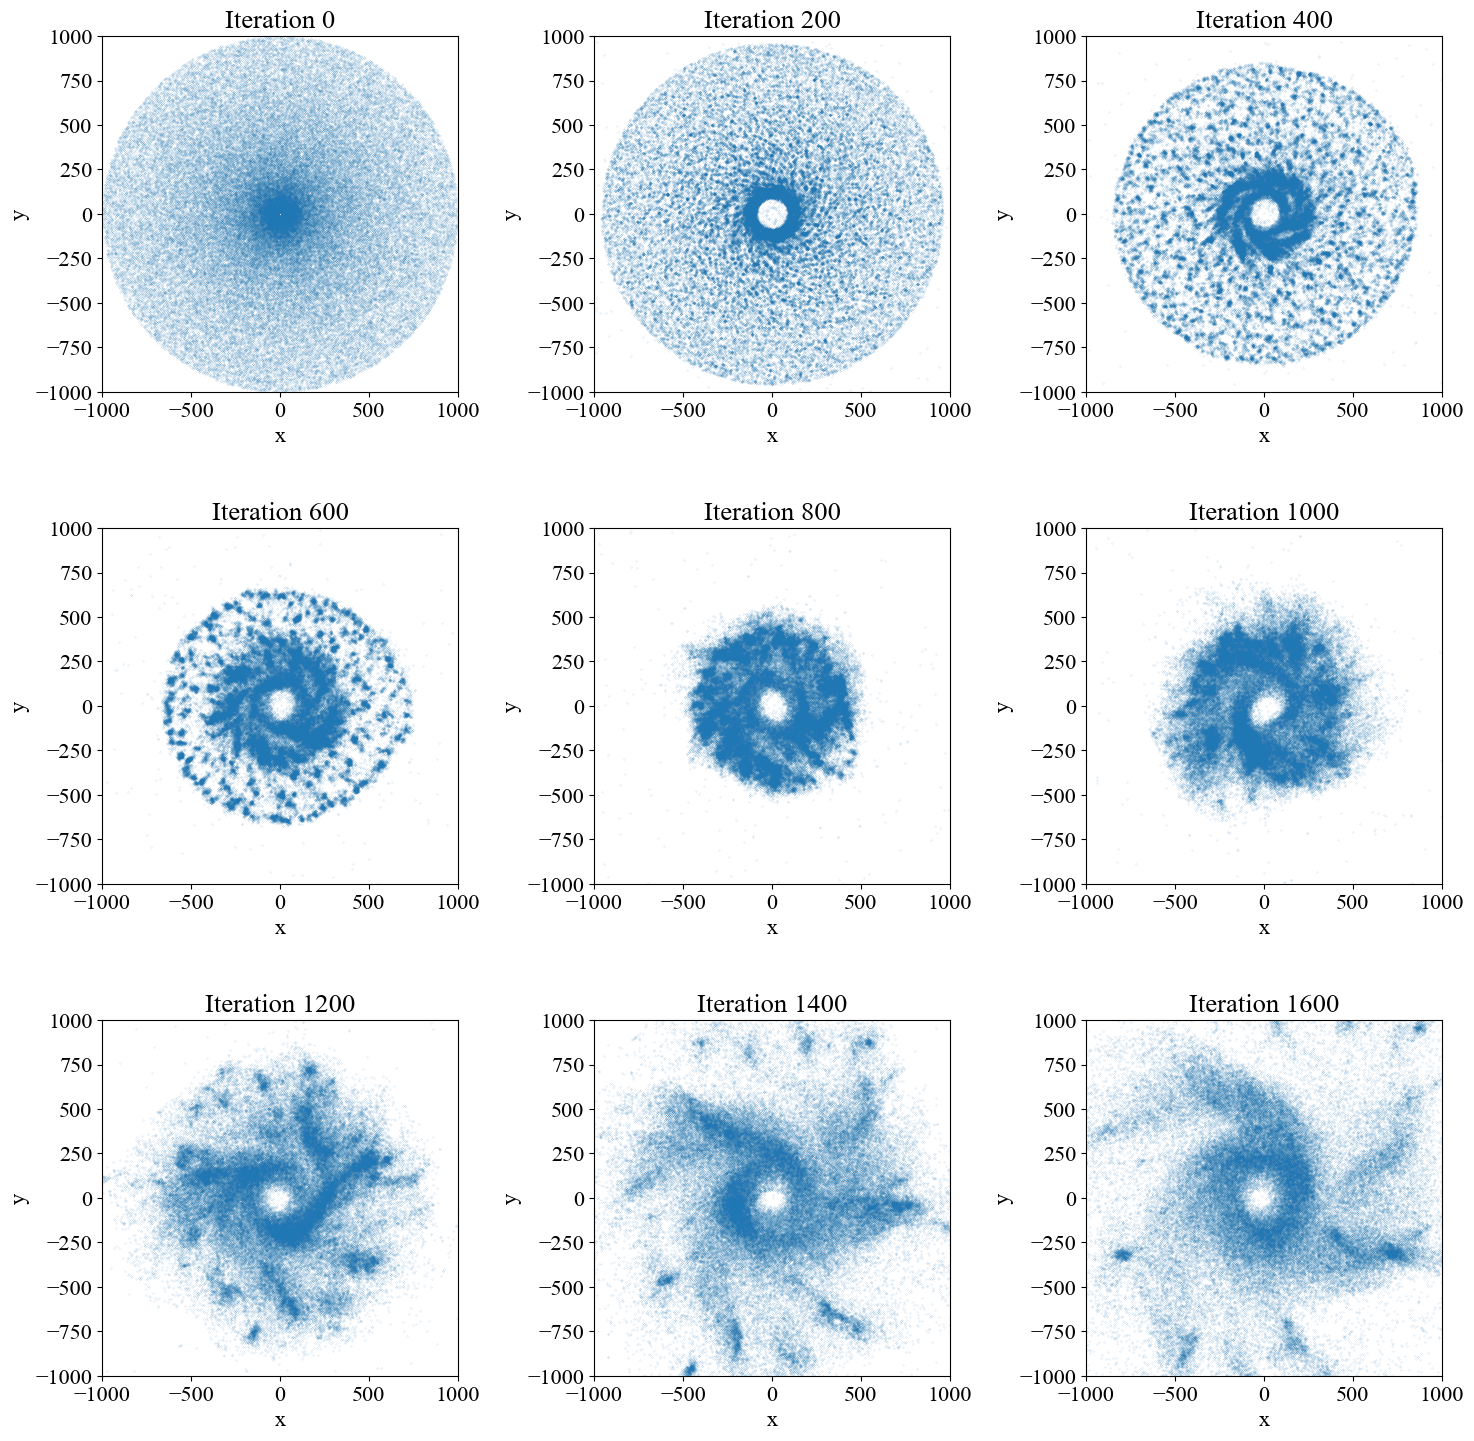

In [7]:
# Function to load positions from a file, skipping lines with 'NULL'
def load_positions(filename):
    valid_lines = []
    with open(filename, 'r') as file:
        for line in file:
            if 'NULL' not in line:
                parts = line.split()
                if len(parts) == 3:
                    valid_lines.append(line)
    # Convert the valid lines into a numpy array
    data = np.genfromtxt(valid_lines, dtype=float)
    return data

# Function to extract the numeric part from the file name
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else -1

# Load and sort all position files numerically
files = sorted(glob.glob("pos/positions_*.txt"), key=extract_number)

# Define the specific iterations to plot
iterations_to_plot = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600]

# Create a figure with a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Set axis limits for all subplots to ensure they are consistent
xlim, ylim = -1000, 1000

# Plot each iteration
for i, iteration in enumerate(iterations_to_plot):
    # Check if the iteration is available
    if iteration < len(files):
        # Load positions for the specific iteration
        positions = load_positions(files[iteration])

        # Select the subplot
        ax = axes[i // 3, i % 3]

        # Set the axis limits
        ax.set_xlim(xlim, ylim)
        ax.set_ylim(xlim, ylim)

        # Ensure the subplot is square
        ax.set_aspect('equal', 'box')

        # Set labels and title for the subplot
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'Iteration {iteration}')

        # Create the scatter plot for (x, y)
        ax.scatter(positions[:, 0], positions[:, 1], s=0.01, alpha=0.7)
    else:
        print(f"Iteration {iteration} is out of range. Total files: {len(files)}")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [2]:
courses = [
    {"grade": 75, "credit": 2.5},  # Self-management
    {"grade": 67, "credit": 5},    # Introduction to Literature and Media Culture
    {"grade": 77, "credit": 5},    # Fundamentals of Computer Programming
    {"grade": 75, "credit": 7.5},  # Introduction to EAP (Standard Pathway)
    {"grade": 59, "credit": 2.5},  # Transition to University and Beyond
    {"grade": 61, "credit": 5},    # Linear Algebra
    {"grade": 81, "credit": 5},    # Calculus (Science and Engineering)
    {"grade": 62, "credit": 5},    # Physical Education 1
    {"grade": 69, "credit": 2.5},  # Introduction to Moral Cultivation and Basis of Law
    {"grade": 73, "credit": 2.5},  # The Modernization Process of China
    {"grade": 59, "credit": 2.5},  # Professional Skills and Emerging Topics in CS
    {"grade": 78, "credit": 7.5},  # English for Academic Purposes
    {"grade": 68, "credit": 2.5},  # Transition to Intercultural Learning
    {"grade": 96, "credit": 5},    # Multivariable Calculus
    {"grade": 73, "credit": 2.5},  # Physical Education 2
    {"grade": 77, "credit": 5},    # Computer Systems
    {"grade": 52, "credit": 5},    # Introduction to Databases
    {"grade": 74, "credit": 5},    # Introduction to Programming in Java
    {"grade": 62, "credit": 5},    # Discrete Mathematics and Statistics
    {"grade": 66, "credit": 5},    # Advanced Skills for Academic Success
    {"grade": 43, "credit": 5},    # Data Structures
    {"grade": 51, "credit": 5},    # Operating Systems Concepts
    {"grade": 51, "credit": 5},    # Algorithmic Foundations and Problem Solving
    {"grade": 69, "credit": 5},    # Artificial Intelligence
    {"grade": 85, "credit": 2.5},  # Spanish Stage 1
    {"grade": 81, "credit": 5},    # Introduction to Networking
    {"grade": 75, "credit": 5},    # Software Engineering I
    {"grade": 75, "credit": 5},    # Computer Graphics
    {"grade": 79, "credit": 5},    # Decision Computation and Language
    {"grade": 76, "credit": 5},    # Software Engineering Group Project
    {"grade": 75, "credit": 5},    # Advanced OO Programming
    {"grade": 68, "credit": 5},    # Human-Centric Computing
    {"grade": 66, "credit": 5},    # Complexity of Algorithms
    {"grade": 74, "credit": 10},   # Final Year Project
    {"grade": 71, "credit": 5},    # Bio-Computational Systems
    {"grade": 77, "credit": 5},    # Big Data Analytics
    {"grade": 77, "credit": 5},    # Machine Learning
    {"grade": 61, "credit": 5},    # Computer Systems Security
    {"grade": 76, "credit": 5},    # Multi-Agent Systems
    {"grade": 77, "credit": 5},    # Principles of Computer Games Design
]
def get_gpa(grade):
    if grade >= 70:
        return 4.0
    elif grade >= 65:
        return 3.67
    elif grade >= 60:
        return 3.33
    elif grade >= 50:
        return 3.0
    elif grade >= 45:
        return 2.33
    elif grade >= 40:
        return 2.0
    else:
        return 0.0

# 计算加权平均绩点
total_credits = 0
weighted_gpa_sum = 0

for course in courses:
    gpa = get_gpa(course["grade"])
    weighted_gpa_sum += gpa * course["credit"]
    total_credits += course["credit"]

# 平均绩点
average_gpa = weighted_gpa_sum / total_credits
average_gpa

3.7194736842105267

In [4]:
courses = [
    {"grade": 74, "credit": 10},  # Self-management
    {"grade": 71, "credit": 10},  # Self-management
    {"grade": 47, "credit": 10},  # Self-management
    {"grade": 51, "credit": 10},  # Self-management
    {"grade": 68, "credit": 10},  # Self-management
    {"grade": 58, "credit": 10},  # Self-management
    {"grade": 59, "credit": 10},  # Self-management
    {"grade": 63, "credit": 10},  # Self-management
    {"grade": 61, "credit": 20},  # Self-management
    {"grade": 62, "credit": 10},  # Self-management
]
def get_gpa(grade):
    if grade >= 70:
        return 4.0
    elif grade >= 65:
        return 3.67
    elif grade >= 60:
        return 3.33
    elif grade >= 50:
        return 3.0
    elif grade >= 45:
        return 2.66
    elif grade >= 40:
        return 2.0
    else:
        return 0.0

# 计算加权平均绩点
total_credits = 0
weighted_gpa_sum = 0

for course in courses:
    gpa = get_gpa(course["grade"])
    weighted_gpa_sum += gpa * course["credit"]
    total_credits += course["credit"]

# 平均绩点
average_gpa = weighted_gpa_sum / total_credits
average_gpa

3.3318181818181825